In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.drop(columns=['Address'],axis=1,inplace=True)

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [10]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0


In [11]:
df.duplicated().sum()

np.int64(0)

**EDA**

<Axes: xlabel='Avg. Area Income', ylabel='Count'>

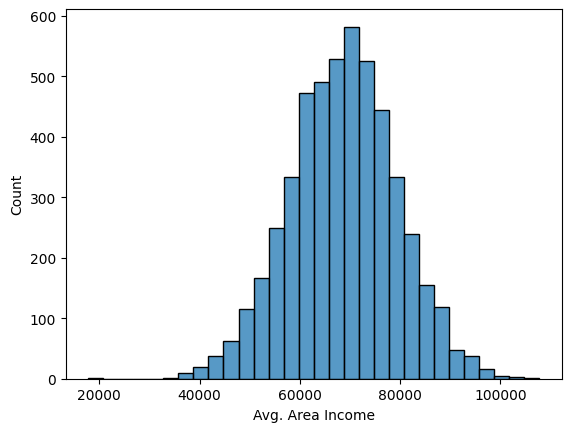

In [18]:
sns.histplot(df['Avg. Area Income'],bins=30)

<Axes: xlabel='Avg. Area House Age', ylabel='Price'>

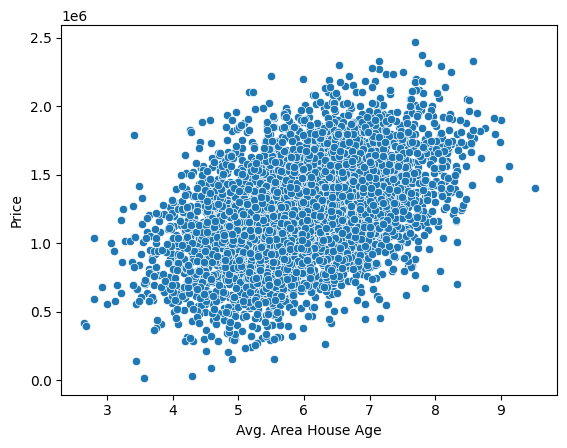

In [19]:
sns.scatterplot(x='Avg. Area House Age',y='Price',data=df)

<Axes: >

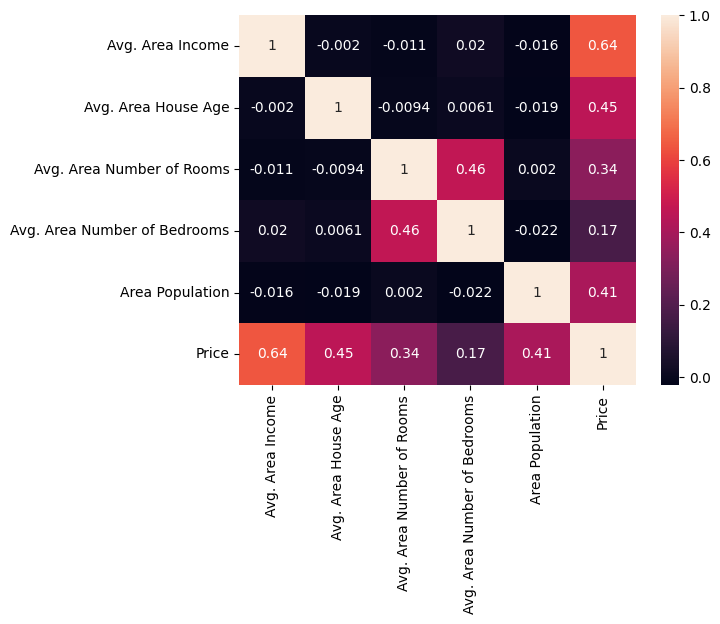

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [15]:
X = df.drop(columns=['Price'])
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [25]:
y_pred_train = lr.predict(X_train)

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_train,y_pred_train)

0.9186953001963705

In [29]:
r2_score(y_test,y_pred)

0.9165334724138281

In [30]:
print(f'training MAE for {lr} is {mean_absolute_error(y_train,y_pred_train)}')
print(f'testing MAE for {lr} is {mean_absolute_error(y_test,y_pred)}')

training MAE for LinearRegression() is 81599.60620338026
testing MAE for LinearRegression() is 80893.8119077018


In [31]:
print(f'training MSE for {lr} is {mean_squared_error(y_train,y_pred_train)}')
print(f'testing MSE for {lr} is {mean_squared_error(y_test,y_pred)}')

training MSE for LinearRegression() is 10322744959.193789
testing MSE for LinearRegression() is 10013679978.58275


In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [33]:
print(f'training r2 for {knn} is {r2_score(y_train,y_pred_train)}')
print(f'testing r2 for {knn} is {r2_score(y_test,y_pred)}')

training r2 for KNeighborsRegressor() is 0.9186953001963705
testing r2 for KNeighborsRegressor() is 0.9165334724138281


In [34]:
print(f'training MAE for {knn} is {mean_absolute_error(y_train,y_pred_train)}')
print(f'testing MAE for {knn} is {mean_absolute_error(y_test,y_pred)}')

training MAE for KNeighborsRegressor() is 81599.60620338026
testing MAE for KNeighborsRegressor() is 80893.8119077018


In [36]:
import joblib
bundle = {
    "best_model":knn,
    "se":sc,
    "feature_columns":X.columns.tolist()
}
joblib.dump(bundle,"housing_model.pkl")
print("model saved")

model saved
